# Vehicle_Sales_Count by Year 2002-2023

### The "Vehicle_Sales_Count by Year 2002-2023" dataset offers a concise overview of annual vehicle sales from 2002 to 2023. It provides key insights into the fluctuations and trends in vehicle sales over this period, aiding in market analysis and decision-making processes.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Data Importing

In [2]:
db = pd.read_csv(r"C:\Users\AKASH N\Downloads\MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_December_2023.csv")
db

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
...,...,...,...,...,...,...
259,2023,AUG,25876,52725,1222581892,908454060
260,2023,SEP,23892,45386,1134437699,744676584
261,2023,OCT,23775,45473,1122680147,740582533
262,2023,NOV,22720,42260,1062465105,694190564


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              264 non-null    int64 
 1   Month             264 non-null    object
 2   New               264 non-null    int64 
 3   Used              264 non-null    int64 
 4   Total Sales New   264 non-null    int64 
 5   Total Sales Used  264 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.5+ KB


In [4]:
db.isnull().sum()

Year                0
Month               0
New                 0
Used                0
Total Sales New     0
Total Sales Used    0
dtype: int64

In [5]:
db.columns

Index(['Year ', 'Month ', 'New', 'Used', 'Total Sales New',
       'Total Sales Used'],
      dtype='object')

In [6]:
db.columns = db.columns.str.strip()

In [7]:
db['Year'] = db['Year'].astype(str) 

In [8]:
db.columns

Index(['Year', 'Month', 'New', 'Used', 'Total Sales New', 'Total Sales Used'], dtype='object')

# EDA

### 1. Statistical Analysis

In [9]:
db.describe()

,New,Used,Total Sales New,Total Sales Used
count,264.000000,264.000000,2.640000e+02,2.640000e+02
mean,28127.643939,55426.602273,8.681067e+08,5.587321e+08
std,5706.437162,7706.678721,1.715362e+08,1.525242e+08
min,13700.000000,29420.000000,4.051891e+08,2.955220e+08
25%,23848.500000,50090.750000,7.466069e+08,4.395213e+08
50%,27718.500000,55983.500000,8.883341e+08,5.140906e+08
75%,31473.250000,61022.000000,9.860432e+08,6.919647e+08
max,45547.000000,73163.000000,1.295820e+09,9.347858e+08


### 2. Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

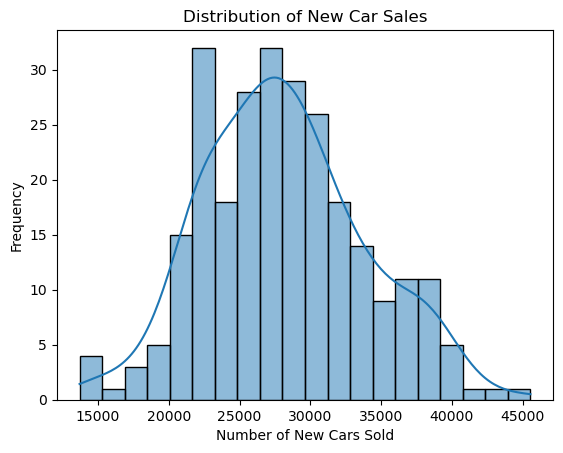

In [11]:
sns.histplot(data=db, x='New', bins=20, kde=True)
plt.title('Distribution of New Car Sales')
plt.xlabel('Number of New Cars Sold')
plt.ylabel('Frequency')
plt.show()

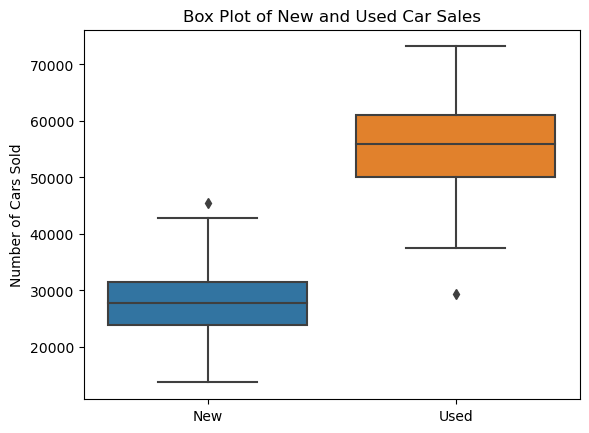

In [12]:
sns.boxplot(data=db[['New', 'Used']])
plt.title('Box Plot of New and Used Car Sales')
plt.ylabel('Number of Cars Sold')
plt.show()

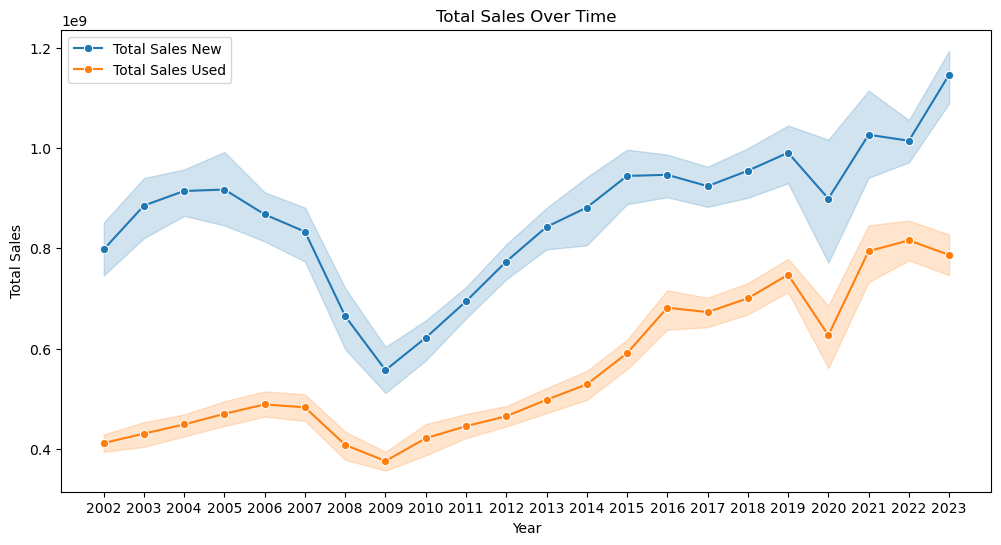

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=db, x='Year', y='Total Sales New', marker='o', label='Total Sales New')
sns.lineplot(data=db, x='Year', y='Total Sales Used', marker='o', label='Total Sales Used')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

### 3. Correlation Matrix

In [14]:
correlation_matrix = db[['New', 'Used', 'Total Sales New', 'Total Sales Used']].corr()
correlation_matrix

,New,Used,Total Sales New,Total Sales Used
New,1.000000,0.630813,0.512398,-0.019111
Used,0.630813,1.000000,0.417664,0.337063
Total Sales New,0.512398,0.417664,1.000000,0.771847
Total Sales Used,-0.019111,0.337063,0.771847,1.000000


### 4. Time Series Analysis

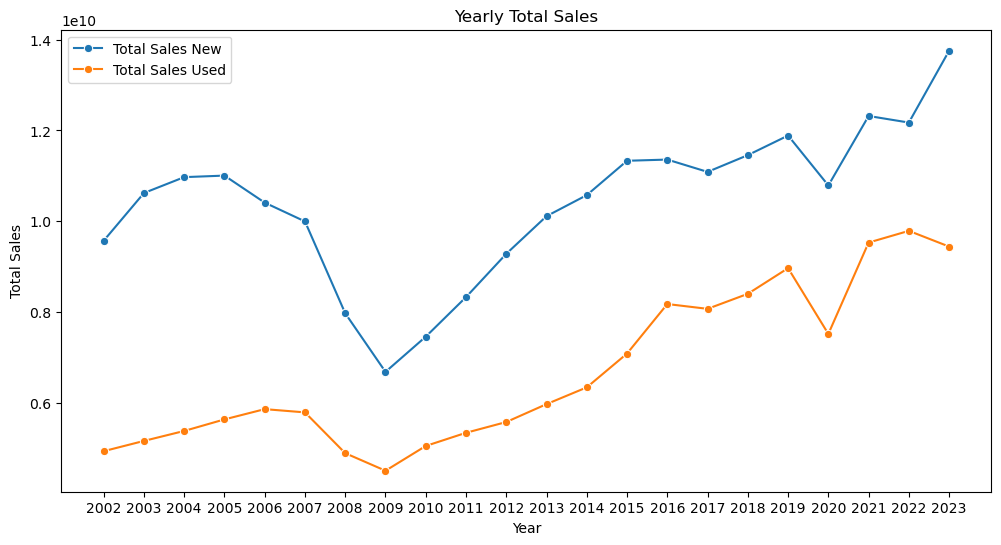

In [15]:
# Grouping data by year and summing sales
yearly_sales = db.groupby('Year')[['New', 'Used', 'Total Sales New', 'Total Sales Used']].sum().reset_index()

# Line plots for yearly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Sales New', marker='o', label='Total Sales New')
sns.lineplot(data=yearly_sales, x='Year', y='Total Sales Used', marker='o', label='Total Sales Used')
plt.title('Yearly Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

### 5. Feature Extraction

- Calculate the ratio of new to used car sales

In [16]:
db['New_to_Used_Ratio'] = db['New'] / db['Used']

In [17]:
db.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,New_to_Used_Ratio
0,2002,JAN,31106,49927,755015820,386481929,0.623030
1,2002,FEB,27520,50982,664454223,361353242,0.539798
2,2002,MAR,34225,58794,805666244,419385387,0.582117
3,2002,APR,36452,59817,846368297,433061150,0.609392
4,2002,MAY,37359,60577,855005784,442569410,0.616719


- Extract the month from the 'Month' column and convert it to numerical values

In [18]:
months_dict = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
               'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
db['Month_Num'] = db['Month'].map(months_dict)

In [19]:
db.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,New_to_Used_Ratio,Month_Num
0,2002,JAN,31106,49927,755015820,386481929,0.623030,1
1,2002,FEB,27520,50982,664454223,361353242,0.539798,2
2,2002,MAR,34225,58794,805666244,419385387,0.582117,3
3,2002,APR,36452,59817,846368297,433061150,0.609392,4
4,2002,MAY,37359,60577,855005784,442569410,0.616719,5


- Create a season feature based on the month

In [20]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
db['Season'] = db['Month_Num'].map(seasons)

In [21]:
db.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,New_to_Used_Ratio,Month_Num,Season
0,2002,JAN,31106,49927,755015820,386481929,0.623030,1,Winter
1,2002,FEB,27520,50982,664454223,361353242,0.539798,2,Winter
2,2002,MAR,34225,58794,805666244,419385387,0.582117,3,Spring
3,2002,APR,36452,59817,846368297,433061150,0.609392,4,Spring
4,2002,MAY,37359,60577,855005784,442569410,0.616719,5,Spring


In [22]:
db = pd.get_dummies(db, columns=['Season'], drop_first=True)
# Convert dummy variables to boolean
db[['Season_Spring', 'Season_Summer', 'Season_Winter']] = db[['Season_Spring', 'Season_Summer', 'Season_Winter']].astype(bool)

In [23]:
db.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,New_to_Used_Ratio,Month_Num,Season_Spring,Season_Summer,Season_Winter
0,2002,JAN,31106,49927,755015820,386481929,0.623030,1,False,False,True
1,2002,FEB,27520,50982,664454223,361353242,0.539798,2,False,False,True
2,2002,MAR,34225,58794,805666244,419385387,0.582117,3,True,False,False
3,2002,APR,36452,59817,846368297,433061150,0.609392,4,True,False,False
4,2002,MAY,37359,60577,855005784,442569410,0.616719,5,True,False,False


In [24]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               264 non-null    object 
 1   Month              264 non-null    object 
 2   New                264 non-null    int64  
 3   Used               264 non-null    int64  
 4   Total Sales New    264 non-null    int64  
 5   Total Sales Used   264 non-null    int64  
 6   New_to_Used_Ratio  264 non-null    float64
 7   Month_Num          264 non-null    int64  
 8   Season_Spring      264 non-null    bool   
 9   Season_Summer      264 non-null    bool   
 10  Season_Winter      264 non-null    bool   
dtypes: bool(3), float64(1), int64(5), object(2)
memory usage: 17.4+ KB


# EDA on Corrected data

### 1. Correlation Matrix

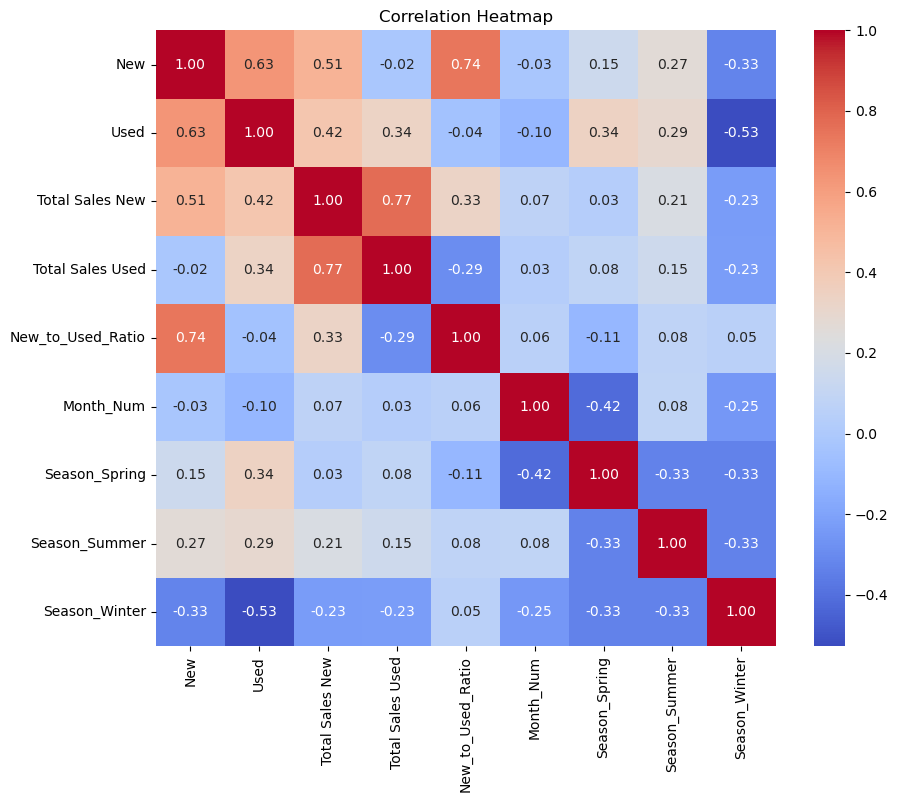

In [25]:
numeric_data = db.drop(columns=['Year', 'Month'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
correlation_matrix

,New,Used,Total Sales New,Total Sales Used,New_to_Used_Ratio,Month_Num,Season_Spring,Season_Summer,Season_Winter
New,1.000000,0.630813,0.512398,-0.019111,0.739851,-0.025056,0.145839,0.266112,-0.329261
Used,0.630813,1.000000,0.417664,0.337063,-0.044904,-0.104010,0.342403,0.293748,-0.527427
Total Sales New,0.512398,0.417664,1.000000,0.771847,0.326914,0.071862,0.032782,0.212235,-0.231394
Total Sales Used,-0.019111,0.337063,0.771847,1.000000,-0.289002,0.033135,0.084299,0.152701,-0.226365
New_to_Used_Ratio,0.739851,-0.044904,0.326914,-0.289002,1.000000,0.056496,-0.109015,0.076411,0.054690
Month_Num,-0.025056,-0.104010,0.071862,0.033135,0.056496,1.000000,-0.418121,0.083624,-0.250873
Season_Spring,0.145839,0.342403,0.032782,0.084299,-0.109015,-0.418121,1.000000,-0.333333,-0.333333
Season_Summer,0.266112,0.293748,0.212235,0.152701,0.076411,0.083624,-0.333333,1.000000,-0.333333
Season_Winter,-0.329261,-0.527427,-0.231394,-0.226365,0.054690,-0.250873,-0.333333,-0.333333,1.000000


1. The correlation coefficient between 'New' and 'Total Sales New' stands at 0.512, suggesting a moderate positive correlation. This indicates that as total new car sales increase, there's a tendency for the number of new cars sold to also increase.
2. With a correlation coefficient of 0.418, the relationship between 'Used' and 'Total Sales New' reveals a moderate positive correlation. This implies that as total new car sales rise, there's a tendency for the number of used cars sold to increase as well.
3. 'New' and 'Used' exhibit a correlation coefficient of 0.631, indicating a moderately strong positive correlation. This implies that as the number of new cars sold increases, there's a tendency for the number of used cars sold to also increase.
4. The correlation coefficient of 0.740 between 'New' and 'New_to_Used_Ratio' suggests a strong positive correlation. This signifies that as the number of new cars sold rises, there's a strong tendency for the ratio of new to used car sales to increase.
5. 'Used' and 'Season_Winter' show a correlation coefficient of -0.527, suggesting a moderately strong negative correlation. This indicates that during the winter season, there's a tendency for the number of used cars sold to decrease.

### 2. Seasonal Dataa

In [27]:
seasonal_monthly_sales = db.groupby(['Season_Spring', 'Season_Summer', 'Season_Winter', 'Month'])[['New', 'Used']].mean().reset_index()
seasonal_monthly_sales

,Season_Spring,Season_Summer,Season_Winter,Month,New,Used
0,False,False,False,NOV,24233.863636,49567.954545
1,False,False,False,OCT,27903.818182,56363.409091
2,False,False,False,SEP,29798.000000,56002.818182
3,False,False,True,DEC,25184.727273,47238.136364
4,False,False,True,FEB,22263.363636,49481.500000
5,False,False,True,JAN,27190.272727,48479.363636
6,False,True,False,AUG,30382.454545,60373.454545
7,False,True,False,JUL,30049.409091,58545.136364
8,False,True,False,JUN,31826.727273,59102.090909
9,True,False,False,APR,29497.045455,59110.227273


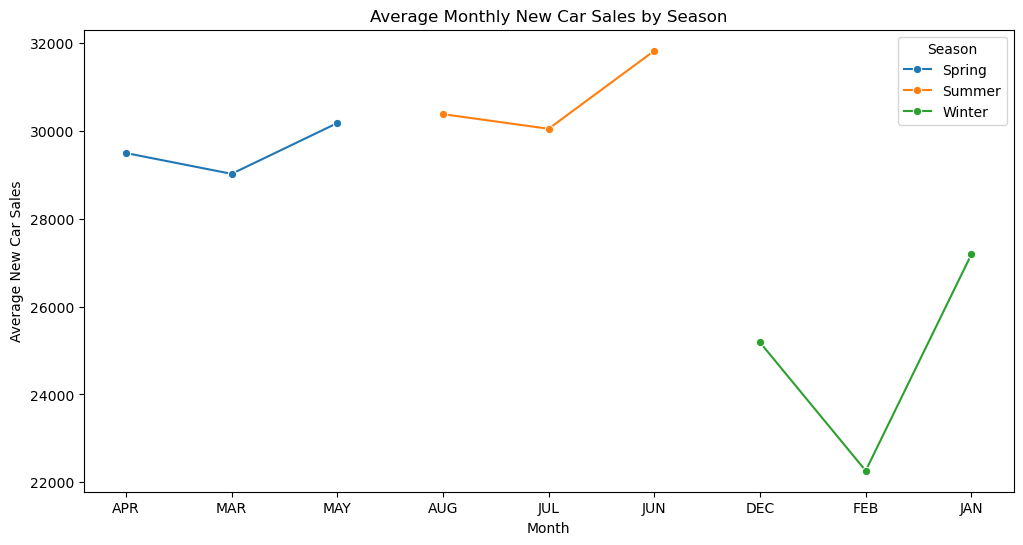

In [28]:
plt.figure(figsize=(12, 6))

# Plot for Spring season
sns.lineplot(data=seasonal_monthly_sales[seasonal_monthly_sales['Season_Spring']], 
             x='Month', y='New', marker='o', label='Spring')

# Plot for Summer season
sns.lineplot(data=seasonal_monthly_sales[seasonal_monthly_sales['Season_Summer']], 
             x='Month', y='New', marker='o', label='Summer')

# Plot for Winter season
sns.lineplot(data=seasonal_monthly_sales[seasonal_monthly_sales['Season_Winter']], 
             x='Month', y='New', marker='o', label='Winter')

plt.title('Average Monthly New Car Sales by Season')
plt.xlabel('Month')
plt.ylabel('Average New Car Sales')
plt.legend(title='Season')
plt.show()

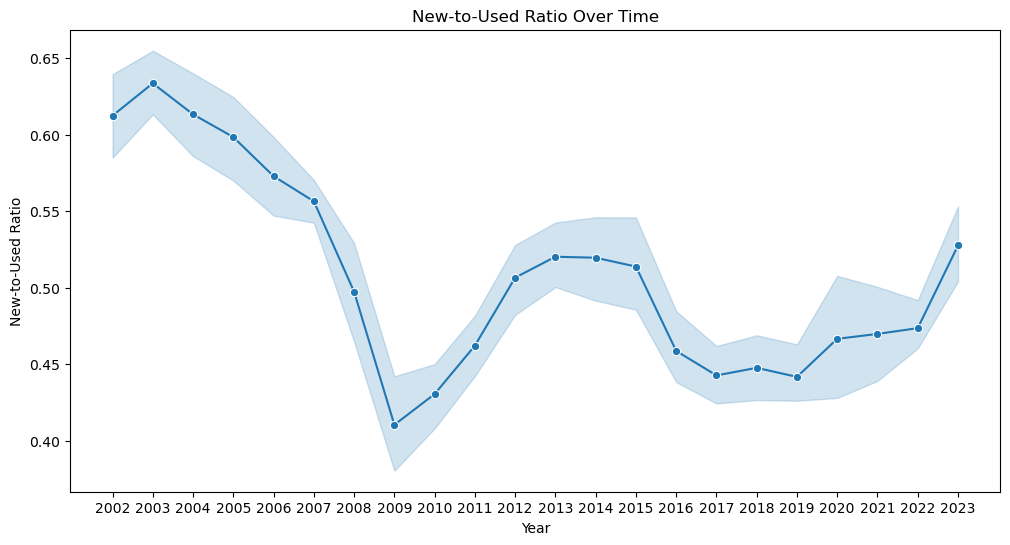

In [31]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a line plot using Seaborn
sns.lineplot(data=db, x='Year', y='New_to_Used_Ratio', marker='o')

# Set the title and axis labels
plt.title('New-to-Used Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('New-to-Used Ratio')

# Display the plot
plt.show()


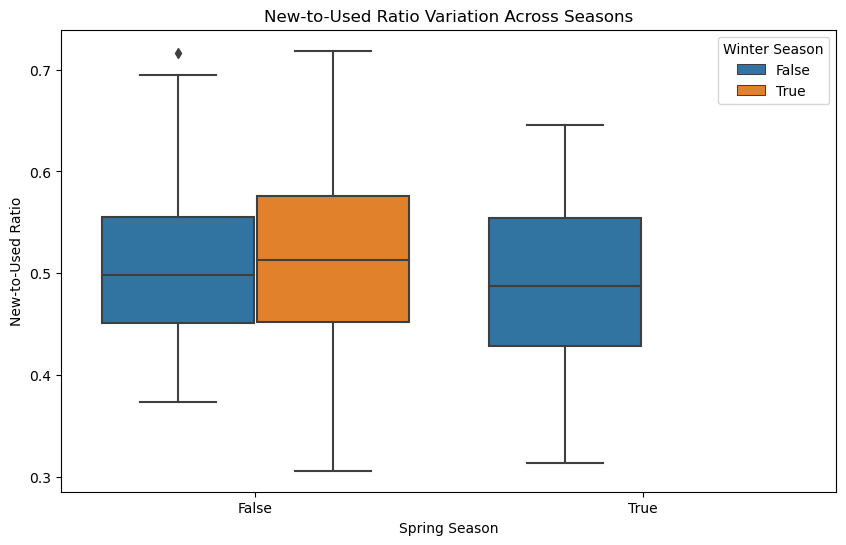

In [33]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a box plot using Seaborn
sns.boxplot(data=db, x='Season_Spring', y='New_to_Used_Ratio', hue='Season_Winter')

# Set the title and axis labels
plt.title('New-to-Used Ratio Variation Across Seasons')
plt.xlabel('Spring Season')
plt.ylabel('New-to-Used Ratio')

# Set legend title and location
plt.legend(title='Winter Season', loc='upper right')

# Display the plot
plt.show()
